# A Notebook to Use Decision Tree Classifiers

This notebook shows how to train a decision tree to classify unseen instances.

 
* The variable "dataset" stores the name of text file that you input and is passed as an argument of the function "loadDataSet()".  
* The variable "attributes" stores the names of all features. The variable "instances" stores the values of all features in the training set. The variable "labels" stores the labels of all instances.  
* The variable "clf" stores a decision tree model, and it can be trained with "instances" and "labels". Once the model is trained, it can be used to predict unseen instances.  We use a type of decision tree algorithm called CART (Classification and Regression Trees). 
* The variable "n_foldCV" stores the number of times of n-fold cross validation that you input.
* The function "cross_val_scores" assesses the accuracy scores of a decision tree model.  Its inputs are "clf", "instances", "labels", "n_foldCV".
* The variable "scores" stores the accuracy of an n-fold cross validation of the model.


In [1]:
import numpy as np
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import graphviz

def loadDataSet(dataset):
    with open(dataset) as f:
        data=f.readlines()
        attributes=data[0].rstrip().split(',')[:-1]
        instances=[entry.rstrip().split(',')[:-1] for entry in data[1:]]
        dataArray=[]
        Dict={}
        for i in range(len(instances[0])):
            try:
                dataArray.append([float(instance[i]) for instance in instances])
            except:
                encodedData,vocab=encode([instance[i] for instance in instances])
                dataArray.append(encodedData)
                Dict[i]=vocab
                print(attributes[i],': ',list(vocab.items()))
        instances=np.array(dataArray).T
        labels=[entry.rstrip().split(',')[-1] for entry in data[1:]]
        return attributes,instances,labels,Dict

def encode(data):
    vocab={}
    uniqueVals=list(set(data))
    for Val in uniqueVals:
        vocab[Val]=uniqueVals.index(Val)
    encodedData=list(map(uniqueVals.index,data))
    return encodedData,vocab

## Training: Building a Decision Tree Classifier ##

The cell below asks for a dataset. It trains a decision tree classifier. 

We provide two classification datasets that could be applied to the decision tree algorithms. 
* ["iris.txt"](https://archive.ics.uci.edu/ml/datasets/iris) has four attributes with continuous values describing three different iris species.
* ["lenses.txt"](https://archive.ics.uci.edu/ml/datasets/lenses) contains four attributes with discrete values and three classes.



In [2]:
import pandas as pd
dataset=input('Please Enter Your Dataset:')
df=pd.read_csv(dataset)
display(df)

Please Enter Your Dataset:C:/Users/Sam/Desktop/INF549/iris.txt


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Feature encoding
Many classifiers only take numerical data and some datasets have features that are not numerical. For example, a feature can be the state that a person lives in. Those are called [categorical features](https://en.wikipedia.org/wiki/Categorical_variable). In that case,we need to encode categorical features into discrete values. This process is called feature encoding

In our notebook, if your dataset contains categorical features, you will see the code rules in the cell below. In the next section, when you are prompted to input test set for prediction, the algorithm will automatically encode the relevant categorical features according to the code rules showned below 

In [3]:
attributes,instances,labels,Dict=loadDataSet(dataset)
clf = tree.DecisionTreeClassifier()
clf.fit(instances,labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Visualizing a Decision Tree##

The following cell will generate a visualization of the decision tree.

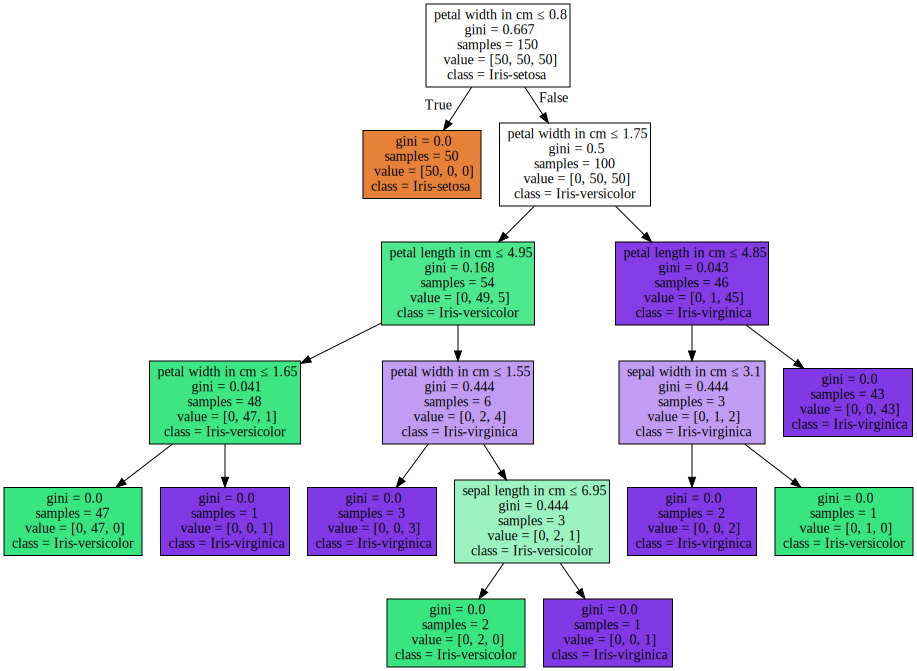

In [4]:
dot_data = tree.export_graphviz(clf, out_file=None,max_depth=5,\
feature_names=attributes,class_names=clf.classes_,label='all',\
filled=True,special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

## Prediction: Classifying New Instances Using a Decision Tree Classifier##

The cell below classifies new instances with the decision tree you created.


Each feature value is separated with a comma, and should have the same length as the instances in the training set. 

In [5]:
testset=input('Please Enter Your Test Set:')
testset=testset.strip().split(",")
temp=[]
for i in range(len(testset)):
    try:
        temp.append(float(testset[i]))
    except:
        temp.append(Dict[i][testset[i]])
testset=np.array(temp).reshape((1,len(temp)))
predictions=clf.predict(testset)

Please Enter Your Test Set:4.8,3,1.1,0.2


In [6]:
print(predictions)

['Iris-setosa']


## Evaluating the Accuracy of a Decision Tree Classifier##

The following cell will run cross-validation to evaluate your decision tree classifier.  It will ask you for your test data, and the number of folds that you want to use.

In [7]:
dataset=input('Please Enter Your Test Data:')
n_foldCV=int(input("Please Enter the Number of Folds:"))
attributes,instances,labels,Dict=loadDataSet(dataset)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(instances,labels)
scores = cross_val_score(clf, instances, labels, cv=n_foldCV)

Please Enter Your Test Data:C:/Users/Sam/Desktop/INF549/iris.txt
Please Enter the Number of Folds:10


The following cell will output the accuracy score for each fold and the accuracy estimate of the model under 95% confidence interval.

In [8]:
print("Sores:")
[print(score) for score in scores]
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Sores:
1.0
0.9333333333333333
1.0
0.9333333333333333
0.9333333333333333
0.8666666666666667
0.9333333333333333
1.0
1.0
1.0
Accuracy: 0.96 (+/- 0.09)
